In [1]:
from fastai.vision.all import *

In [2]:
path = Path('./data/')

In [3]:
tfms = aug_transforms(flip_vert=True, max_warp=0)

In [4]:
def label_func(o):
    return list((parent_label(o), ))

In [5]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock), 
                   get_items = get_image_files,
                   get_y = label_func,
                   item_tfms=Resize(224), 
                   batch_tfms=tfms)

dls = dblock.dataloaders(path, bs=32)

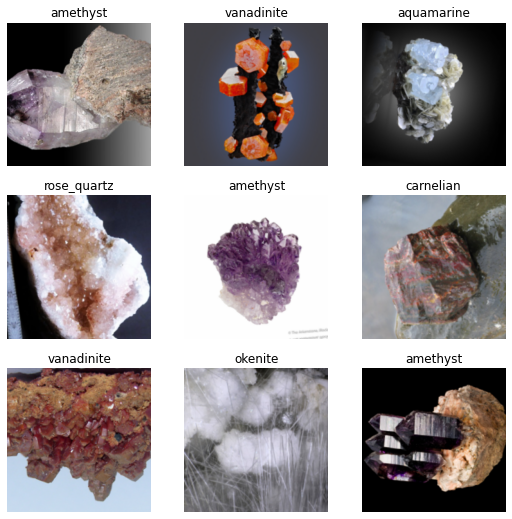

In [6]:
dls.show_batch()

In [7]:
learn = cnn_learner(dls, resnet18, metrics=accuracy_multi)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/arto/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.03981071710586548)

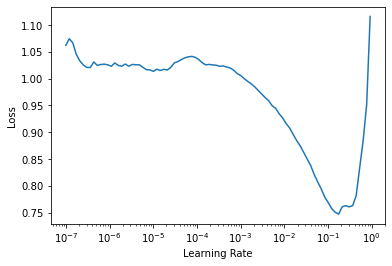

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(3, 0.02)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.524908,0.281441,0.915089,00:16
1,0.312932,0.188482,0.936317,00:16
2,0.213158,0.106870,0.959266,00:16


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, 0.0001)

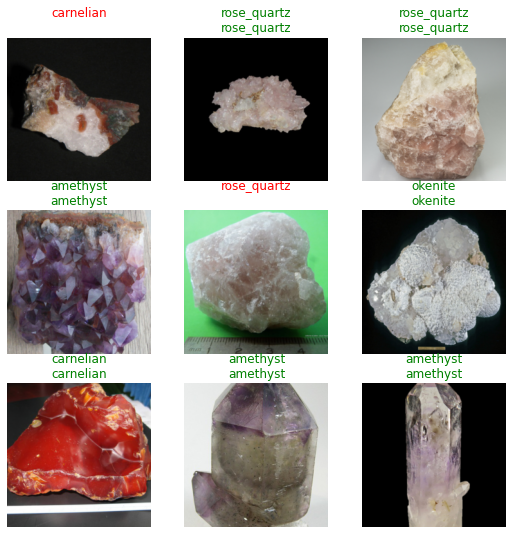

In [10]:
learn.show_results()

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

In [13]:
# clean = ImageClassifierCleaner(learn)
# clean

,target,predicted,probabilities,loss
0,rose_quartz,amethyst,"tensor([8.8075e-01, 1.6375e-04, 4.2425e-02, 5.3895e-05, 6.5076e-04, 1.1096e-03,\n 2.5719e-01])",1.3245476484298706
1,carnelian,amethyst,"tensor([9.2892e-01, 1.1635e-04, 9.4242e-03, 1.7902e-04, 1.6496e-03, 1.0616e-04,\n 4.2192e-01])",1.122650146484375
2,okenite,,"tensor([3.5721e-02, 4.5789e-01, 2.3553e-04, 9.3172e-04, 1.8816e-03, 1.9767e-03,\n 9.7509e-02])",1.1048344373703003
3,rose_quartz,amethyst,"tensor([9.9495e-01, 1.4190e-04, 2.3573e-05, 9.8425e-06, 8.7109e-06, 8.8316e-02,\n 2.3775e-06])",1.1021543741226196
4,okenite,aquamarine,"tensor([4.6677e-04, 8.9320e-01, 1.0633e-03, 8.3939e-03, 4.6389e-04, 4.3338e-03,\n 6.7121e-05])",1.0033457279205322
5,amethyst,vanadinite,"tensor([2.2043e-01, 1.7105e-03, 1.9104e-03, 2.2289e-04, 1.4055e-02, 1.7588e-04,\n 9.8930e-01])",0.8668919205665588
6,rose_quartz,carnelian,"tensor([9.5139e-02, 1.1898e-03, 9.5458e-01, 8.2840e-04, 1.2724e-04, 6.0552e-02,\n 4.4026e-03])",0.8575260043144226
7,okenite,pyromorphite,"tensor([5.6674e-04, 6.8722e-04, 2.0046e-03, 1.2405e-01, 9.7725e-01, 5.5787e-03,\n 3.7940e-04])",0.8399201035499573


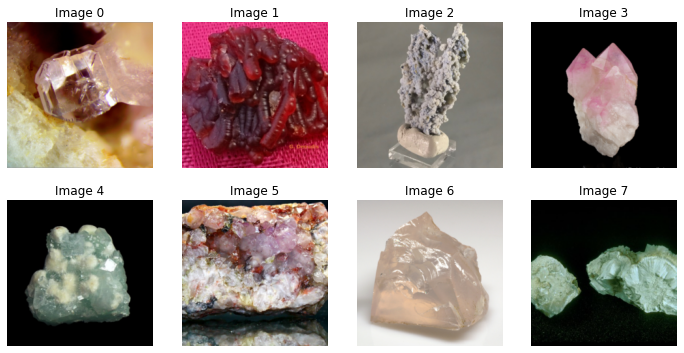

In [12]:
interp.plot_top_losses(8)

In [13]:
learn.export('export.pkl')

In [14]:
pathe = Path()

In [15]:
learn_inf = load_learner('export.pkl')

In [16]:
learn_inf.predict(pathe/'test_images/375px-Amethyst._Magaliesburg,_South_Africa.jpg')

((#1) ['amethyst'],
 tensor([ True, False, False, False, False, False, False]),
 tensor([9.9914e-01, 1.3744e-03, 7.2950e-05, 1.0952e-04, 4.0314e-04, 1.6844e-04,
         3.8882e-03]))

In [17]:
learn_inf.predict(pathe/'test_images/390px-Vanadinite_3.jpeg')

((#1) ['vanadinite'],
 tensor([False, False, False, False, False, False,  True]),
 tensor([1.6511e-02, 5.2898e-04, 1.1536e-02, 9.2234e-06, 5.3586e-04, 1.1429e-04,
         9.9549e-01]))

In [18]:
learn_inf.predict(pathe/'test_images/450px-Carneol-Kristalle_Magic_Stones.jpg')

((#2) ['amethyst','carnelian'],
 tensor([ True, False,  True, False, False, False, False]),
 tensor([9.5543e-01, 1.0509e-04, 5.0732e-01, 4.9454e-05, 1.0063e-04, 9.0652e-05,
         3.4638e-01]))

In [19]:
learn_inf.predict(pathe/'test_images/caholong.jpg')

((#1) ['okenite'],
 tensor([False, False, False,  True, False, False, False]),
 tensor([6.7321e-03, 7.2294e-04, 8.4425e-05, 9.9982e-01, 3.2615e-05, 1.6853e-03,
         1.8879e-04]))

In [25]:
from fastai.vision.widgets import *

In [26]:
btn_upload = widgets.FileUpload()

In [27]:
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [28]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(224,224))
    pred,pred_idx,probs = learn_inf.predict(img)
    if pred:
        prediction = pred[0]
        proba = probs[pred_idx].item()
        lbl_pred.value = f'Prediction: {prediction}; Probability: {proba:.04f}'
    else:
        idx = probs.argmax().item()
        proba = probs.max().item()
        prediction = learn_inf.dls.vocab[idx]
        lbl_pred.value = f'Failed to identify the mineral. Prediction: {prediction}; Probability: {proba:.04f}'

btn_upload.observe(on_data_change, names=['data'])

In [29]:
display(VBox([widgets.Label('Upload a photo of the mineral'), btn_upload, out_pl, lbl_pred]))